In [1]:
# import package
from langgraph.graph import StateGraph , START, END
from typing import TypedDict

In [2]:
# define state
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category : str

In [4]:
# python function for node -1
def calculate_bmi(state:BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight /(height**2)
    state['bmi'] = bmi
    return state

In [6]:
# python function for node -2
def label_bmi (state: BMIState) ->BMIState:
    bmi = state['bmi']

    if bmi < 18.5 :
        state['category'] = "Underweight"
    elif 18.5 < bmi <25 :
        state["category"] = "Normal"
    elif 25 < bmi < 30:
        state["category"] = "OverWeight"
    else:
        state["category"] = "Obese"
    
    return state

In [3]:
# define the graph
graph = StateGraph(BMIState)

In [7]:
# add the node
graph.add_node("calculate_bmi", calculate_bmi)  # <diaplyed-node-name> , <fython function>
graph.add_node("label_bmi", label_bmi)

In [8]:
# make connection with edges
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi", "label_bmi")
graph.add_edge("label_bmi",END)

In [9]:
#compile graph
workflow = graph.compile()

In [11]:
# execute the graph 
initial_state = {'weight_kg' : 90 , 'height_m' : 1.8}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 90, 'height_m': 1.8, 'bmi': 27.777777777777775, 'category': 'OverWeight'}


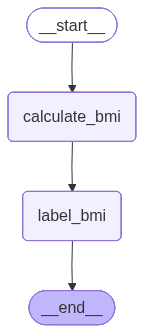

In [12]:
workflow